### Regan Alt
### Programming with Python section 3
### Programming Project 5

## Q1. Picture of Fordham

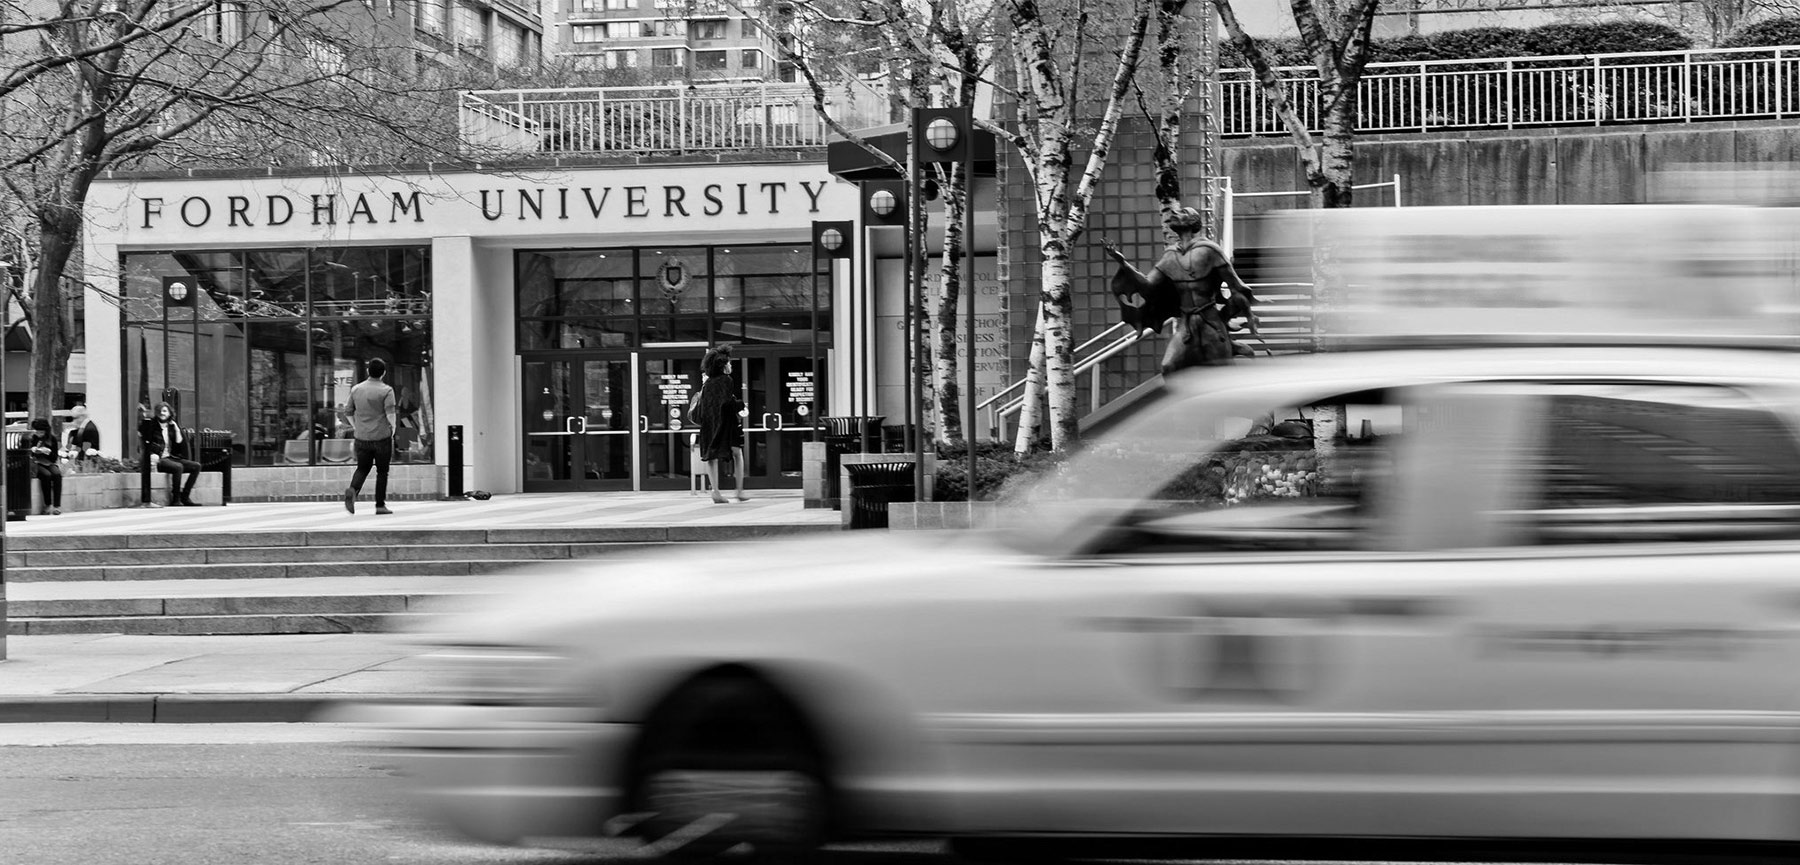

In [65]:
from IPython.display import Image
Image("https://www.fordham.edu/images/gsb_fordham_lc_students.jpg")

## Q2. Import Pandas and download 6 months of histoircal trading data of Tesla (TSLA)

In [66]:
# import pandas and matplotlib.pyplot modules   and assign an ALIAS to the library name
# make all the charts appear inlie in the notebook and not in a  popup window.import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# set display precision of pandas
pd.set_option('display.precision',2)

## Q3. Read the data in Pandas and store as a data frame as tesla

In [67]:
# read the goog.csv file and display the contents
tesla = pd.read_csv("TSLA.csv")
#tesla = pd.read_csv("TSLA.csv", index_col="Date")
# you can specify a parameter to the head method, the number of rows to display. default = 5
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/21/2020,163.20,166.50,159.20,165.52,165.52,12254600
1,5/22/2020,164.43,166.36,162.40,163.38,163.38,9987500
2,5/26/2020,166.90,166.92,163.14,163.77,163.77,8089700
3,5/27/2020,164.17,165.54,157.00,164.05,164.05,11549500
4,5/28/2020,162.70,164.95,160.34,161.16,161.16,7255600
...,...,...,...,...,...,...,...
124,11/16/2020,408.93,412.45,404.09,408.09,408.09,26838600
125,11/17/2020,460.17,462.00,433.01,441.61,441.61,61188300
126,11/18/2020,448.35,496.00,443.50,486.64,486.64,78044000
127,11/19/2020,492.00,508.61,487.57,499.27,499.27,62475300


## Q4. Due diligence - check all attributes of data frame

In [68]:
# how many rows and columns in tesla
tesla.shape

(129, 7)

In [69]:
# total number of cells in the data frame = #columns * #rows
tesla.size

903

In [70]:
# what are the column names
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [71]:
# what is the index of the dataframe
tesla.index

RangeIndex(start=0, stop=129, step=1)

In [88]:
#what are the data types of each column? String, integer, floating point number - tesla.dtypes
tesla.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume       float64
dtype: object

In [73]:
# what is the data type of tesla?
type(tesla)

pandas.core.frame.DataFrame

## Q5. Are there missing values in the Closeing Price column?

No, there are no missing values in the Closing price Column. This is seen below from the code which extracted the data from this specific column, and outputed whether there is any missing data as 'True', and no missing data as 'False'. The only reason there may be missing data in the Closing price column is because after looking at the data online, there was a 5:1 stock split on August 31st, 2020. This divided Tesla's existing outstanding shares into 5, however, this split does not change the price of the shares from their pre-split amounts. Thus, stakeholders now have more shares for the same price, but this does not result in missing values in the Closing price column in the dataset. 

In [74]:
close = tesla.Close
# calc percentage of data that is missing in this series
print("Number of missing closing prices:", close.isnull().sum() * 100 / len(tesla))


Number of missing closing prices: 0.0


## Q6. rename all columns to be lower case, with no spaces in column names

In [75]:
tesla.columns = tesla.columns.str.lower().str.replace(" ", "_")
tesla.head()

,date,open,high,low,close,adj_close,volume
0,5/21/2020,163.20,166.50,159.20,165.52,165.52,12254600
1,5/22/2020,164.43,166.36,162.40,163.38,163.38,9987500
2,5/26/2020,166.90,166.92,163.14,163.77,163.77,8089700
3,5/27/2020,164.17,165.54,157.00,164.05,164.05,11549500
4,5/28/2020,162.70,164.95,160.34,161.16,161.16,7255600


## Q7. Scale the trading volumes to be in thousands of shares

In [76]:
# scale the trading volumns down by a factor of 1000
tesla["volume"] = tesla["volume"] / 1000
tesla.head(10)

,date,open,high,low,close,adj_close,volume
0,5/21/2020,163.20,166.50,159.20,165.52,165.52,12254.6
1,5/22/2020,164.43,166.36,162.40,163.38,163.38,9987.5
2,5/26/2020,166.90,166.92,163.14,163.77,163.77,8089.7
3,5/27/2020,164.17,165.54,157.00,164.05,164.05,11549.5
4,5/28/2020,162.70,164.95,160.34,161.16,161.16,7255.6
5,5/29/2020,161.75,167.00,160.84,167.00,167.00,11764.5
6,6/1/2020,171.60,179.80,170.82,179.62,179.62,74697.5
7,6/2/2020,178.94,181.73,174.20,176.31,176.31,67828.0
8,6/3/2020,177.62,179.59,176.02,176.59,176.59,39747.5
9,6/4/2020,177.98,179.15,171.69,172.88,172.88,44438.5


# Q8. Highest closing price - round price?

In [77]:
# What is the maximum closing price across all dates?
# price.Max() will only display the result. you may want to store it in a variable
close = tesla["close"]
max_price = close.max()
print('Max closing price in US Dollars:', max_price)

Max closing price in US Dollars: 499.26998899999995


**Conclusion** Over the 6 month period, the highest closing price of Tesla's stock was 499.27 US dollars, or almost 500 US dollars.

## Q9. Date of the highest closing price

In [78]:
# get the index of the series where close is maximal
max_ind = tesla['close'].argmax()
date_of_max = tesla['date'][max_ind]
max_price = tesla['close'][max_ind]
print ('Maximum Closing Price and Date of Occurance:',max_price,"on", date_of_max)

Maximum Closing Price and Date of Occurance: 499.26998899999995 on 11/19/2020


**Conclusion** The maximum closing price is thus 499.27 dollars, and it occurred on November 19th, 2020.

## Q10a. Chart showing the Price Distribution of Closing Price

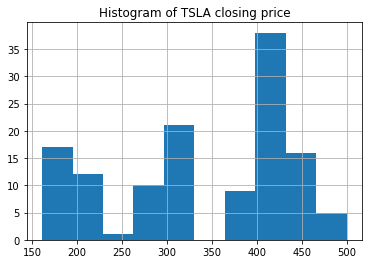

In [79]:
# Plotting distribution of Tesla closing price 
# check distribution of target variable of review score rating to decide how to create buckets
X = tesla["close"]
p = X.hist()
plt.title("Histogram of TSLA closing price")
plt.show()

## Q10b. Chart showing the trend over time of the closing price


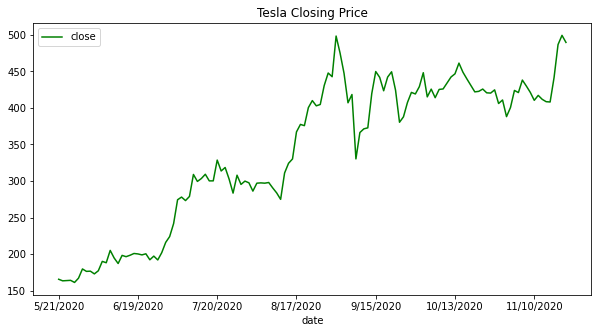

In [80]:
# Plotting Tesla closing price 
p = tesla.plot(x="date", y="close", figsize=(10,5), kind = "line", title = "Tesla Closing Price", color="green")

**Conclusion**
After seeing the histogram which portrays the frequency of Closing Price within the given ranges, it is clear Tesla has closed at a price higher than 400 US dollars per share more than half the time in the last 6 months. This data is visually represented in 10b with the line graph. The trendline varies between 400 dollars and higher around the midway mark of 60 as well. Thus concluding that Tesla's closing price per share is presumably over 400 dollars, and is on trend to be above 500 dollars. 

## Q11. Visual representation between trading volume and closing price

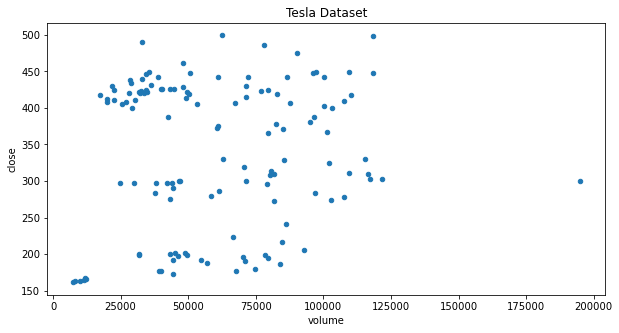

In [81]:
#Create a scatter plot with two columns (volume, close)
tesla.plot(kind="scatter", x = "volume", y = "close", title='Tesla Dataset', figsize=(10,5) );

**Conclusion:** After seeing the Volume and Closing price data visualized in this scatter plot, it can be concluded there is no clear relationship between trading volume and closing price.

## Q12. Chart displaying trading volume over time

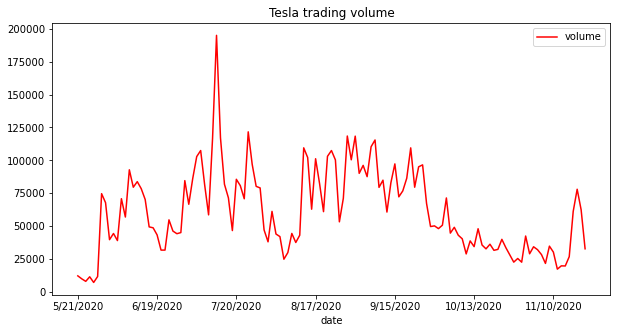

In [82]:
# Plotting Tesla closing price 
p = tesla.plot(x="date", y="volume", figsize=(10,5), kind = "line", title = "Tesla trading volume", color="red")

**Conclusion:** After analyzing the line graph above, Teslas trading volume varies over time, but reached it's peak in July. There is an evident spike in the line when Tesla announced it would be on the S&P 500 in the middle of Novemeber 2020. 

## Q13. Number of Trading days where Closing Price >= 400 dollars

In [83]:
filter1 = close >=400
print("Number of days with price above 400:", filter1.sum())

Number of days with price above 400: 59


**Conclusion** the number of days where Tesla's closing price was greater than or equal to 400 US dollars is 59 days. 

## Q14. Average trading volume over 6 month period (May - November 2020)

In [84]:
# average trading volume
print("average trading volume (in thousands): ", tesla["volume"].mean())

average trading volume (in thousands):  61168.52325581393


**Conclusion** The average trading volume (in thousands) of shares of Tesla's stock over the last 6 months is 61168.52 thousand, or around 61 million.

## Q15. New DataFrame where TSLA stock when trading volume is above average, and closing price is above 300 dollars

In [85]:
vol = tesla["volume"]
filter2 = (vol >= vol.mean()) & (close >= 300)
print("Number of days with above average volume and closing price above 300:", filter2.sum())

tesla_2 = tesla[filter2]
tesla_2.head()

Number of days with above average volume and closing price above 300: 42


,date,open,high,low,close,adj_close,volume
34,7/10/2020,279.20,309.78,275.2,308.93,308.93,116688.0
36,7/14/2020,311.20,318.00,286.2,303.36,303.36,117090.5
37,7/15/2020,308.60,310.00,291.4,309.20,309.20,81839.0
38,7/16/2020,295.43,306.34,293.2,300.13,300.13,71504.0
40,7/20/2020,303.80,330.00,297.6,328.60,328.60,85607.0


**Conclusion** The number of days where the trading volume was above average and closing price was above 300 US dollars over the last 6 months is 42 days. 

## Q16. Create Excel file for when closing price is > 300 and volume > average

In [86]:
# export to the directory of this notebook
tesla_2.to_excel("tesla_out.xlsx", index=False)

## Q17. Time at which code was excuted

In [89]:
import datetime
import getpass
print('/n', 'Finished execution at', datetime.datetime.now())
print(getpass.getuser())

/n Finished execution at 2020-11-30 20:00:05.748628
altre
